In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score, accuracy_score

In [3]:
# Importing deep learning library
import tensorflow
from tensorflow import keras
from keras import Sequential , layers
from keras.layers import Dense

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Loading dataset")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mp-fitt/creditcard_2023.csv")

**EDA ---> Exploratory Data Analysis**

In [6]:

# Dimesension of data
df.shape

(568630, 31)

In [7]:
# Checking columns
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# Upper 5 values of data
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [9]:
# Info related to data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [10]:
# Checking for null values
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# Drop useless id column
df = df.drop(["id"], axis=1)

In [12]:
# Values of legits and fraud transaction
df.Class.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [13]:
df.Amount.describe()

count    568630.000000
mean      12041.957635
std        6919.644449
min          50.010000
25%        6054.892500
50%       12030.150000
75%       18036.330000
max       24039.930000
Name: Amount, dtype: float64

In [14]:
# Dropping duplicates if any
df.drop_duplicates(inplace=True)
df.shape

(568629, 30)

**Data Visualisation**

<Axes: title={'center': 'Covarience by Heatmap'}>

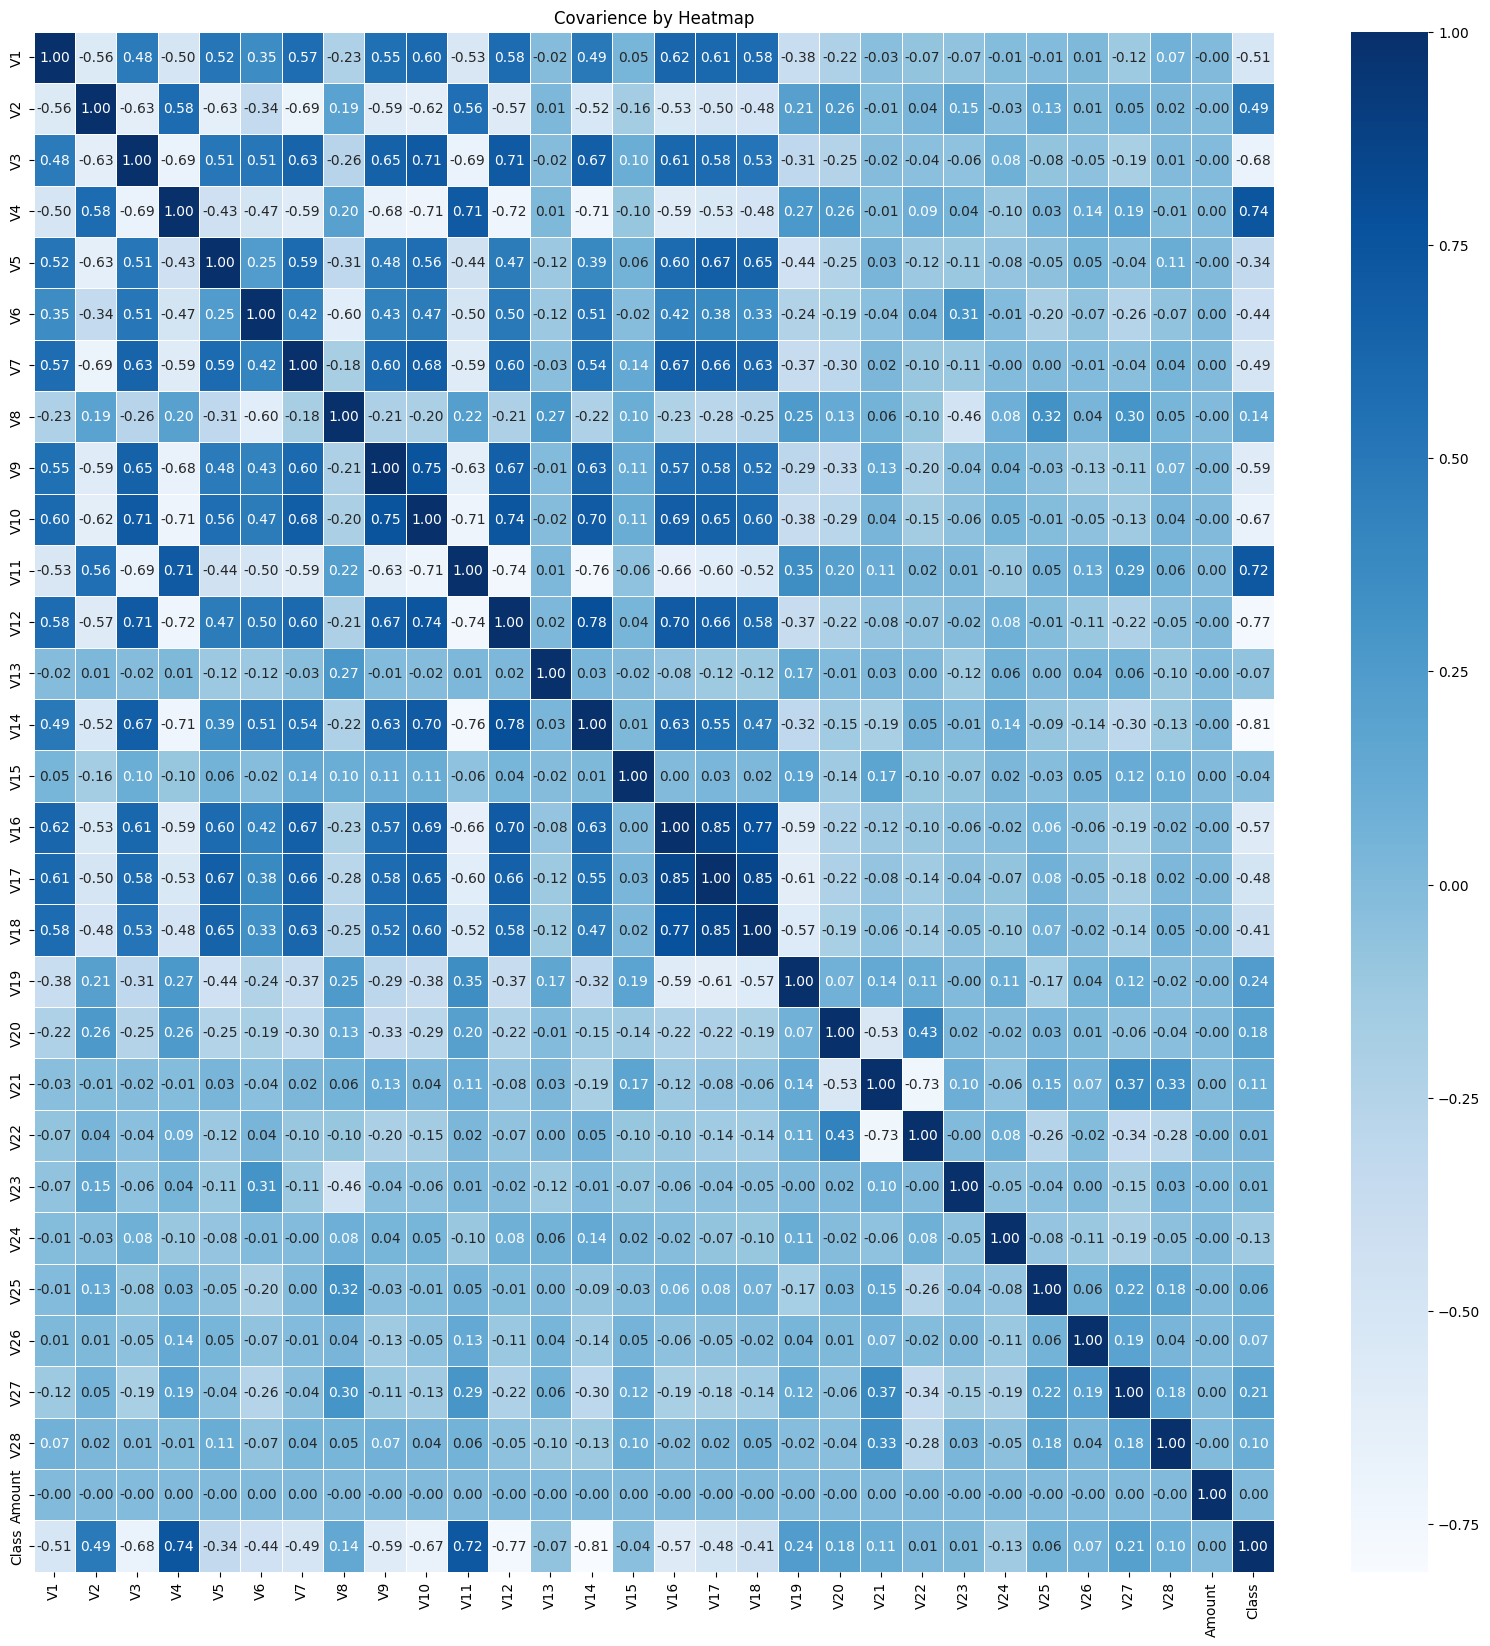

In [15]:
# Here visualising the how columns related to each other
plt.figure(figsize=(20,20))
plt.title("Covarience by Heatmap")
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=.5)

<ipython-input-16-7a2205f137fb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df["Class"], palette='dark')


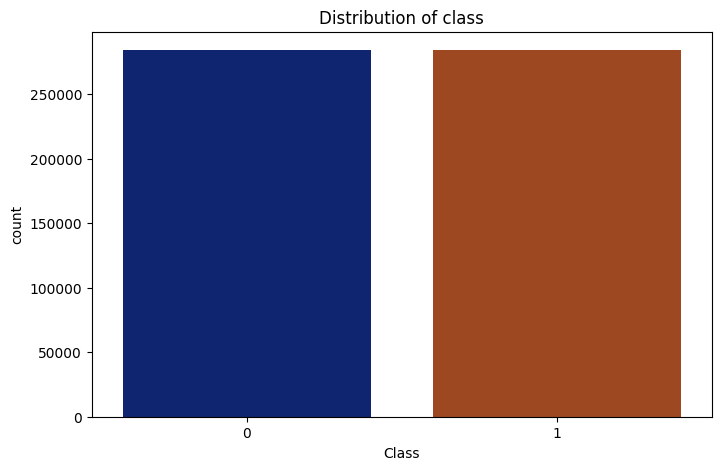

In [16]:
# Visualise the number of fraud and non fraud counts
plt.figure(figsize=(8,5))
plt.title("Distribution of class")
sns.countplot(data=df, x=df["Class"], palette='dark')
plt.show()

**Model_Evaluation**

In [17]:
# Creating X and y, training and target feature
X = df.drop(["Class"],axis=1)
y = df["Class"]

In [18]:
# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398040, 29)
(170589, 29)
(398040,)
(170589,)


In [19]:
# Scale the X_train and X_test
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Random forest Classifier

In [20]:
# Implementing Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train, y_train)
y_rfc = rfc.predict(X_test)
print(f"The score of the model is {rfc.score(X_test, y_test)}")

The score of the model is 0.9998182766766908


In [21]:
print(f"F1-score of the model is {f1_score(y_test, y_rfc)}")

F1-score of the model is 0.9998185553493979


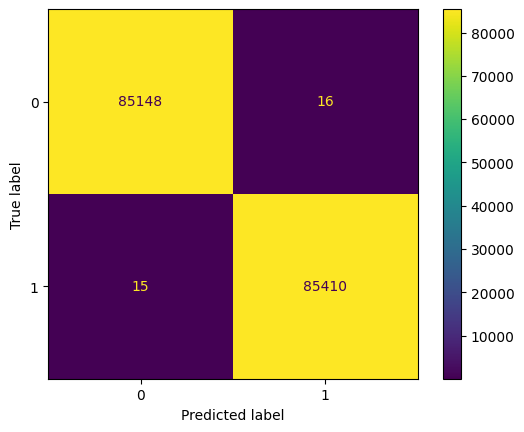

In [22]:
# Constructing Consfusion matrix for RandomForest
cm = confusion_matrix(y_test, y_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Logistic Regression

In [23]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
y_pred_log = model_log.predict(X_test)
print(f"The score of the model is {model_log.score(X_test, y_test)}")

The score of the model is 0.9649156745159418


In [24]:
print(f"f1 score of the model is {f1_score(y_test, y_pred_log)}")

f1 score of the model is 0.9644416718652525


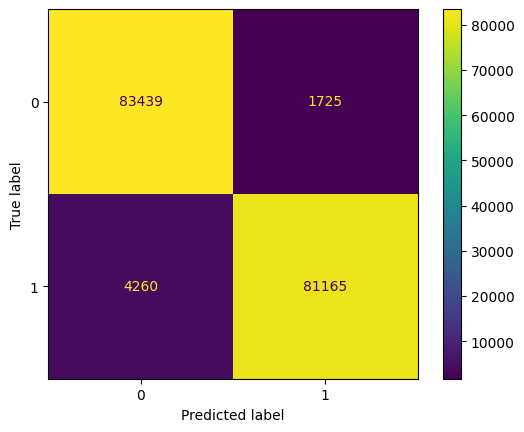

In [25]:
# Constructing Consfusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Support Vector Machine (SVM)

In [26]:
model_svm = SVC(C=1)
model_svm.fit(X_train, y_train)
y_model_svm = model_svm.predict(X_test)
print(f"The score of testing model is {model_svm.score(X_test, y_test)}")

The score of testing model is 0.9967876006073076


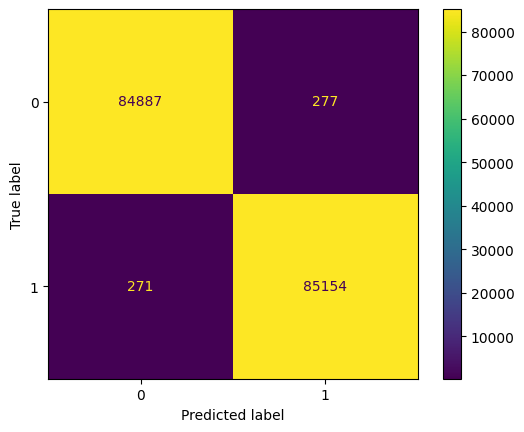

In [27]:
# Constructing Consfusion matrix for RandomForest
cm = confusion_matrix(y_test, y_model_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

K-Neighbor Classifier

In [28]:
# Model of KNeighrestNeighbour
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_model_knn = model_knn.predict(X_test)
print(f"The accuracy score of model is {accuracy_score(y_test, y_model_knn)}")

The accuracy score of model is 0.9976493208823547


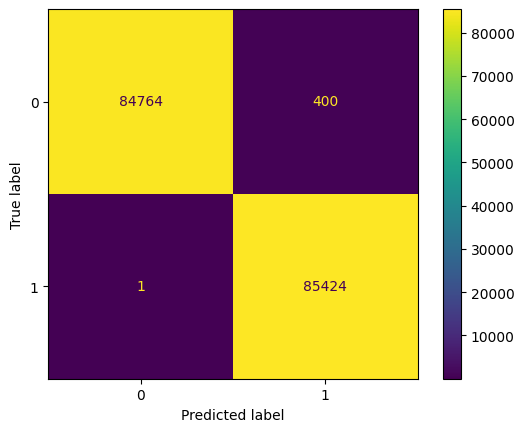

In [29]:
# Constructing Consfusion matrix for KNN
cm = confusion_matrix(y_test, y_model_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Sequential model

In [30]:
# Sequential model
model_seq = Sequential()

model_seq.add(Dense(10, activation="relu", input_dim=29))
model_seq.add(Dense(1, activation="sigmoid"))

In [31]:
# Summary of model
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                300       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 311 (1.21 KB)
Trainable params: 311 (1.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Compile the model
model_seq.compile(loss="binary_crossentropy", optimizer='Adam', metrics=["accuracy"])

In [33]:
# Train the model
history = model_seq.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
9951/9951 [==============================] - 25s 2ms/step - loss: 0.0944 - accuracy: 0.9619 - val_loss: 0.0581 - val_accuracy: 0.9765
Epoch 2/25
9951/9951 [==============================] - 20s 2ms/step - loss: 0.0434 - accuracy: 0.9846 - val_loss: 0.0363 - val_accuracy: 0.9869
Epoch 3/25
9951/9951 [==============================] - 25s 2ms/step - loss: 0.0309 - accuracy: 0.9894 - val_loss: 0.0286 - val_accuracy: 0.9904
Epoch 4/25
9951/9951 [==============================] - 20s 2ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 0.0248 - val_accuracy: 0.9918
Epoch 5/25
9951/9951 [==============================] - 23s 2ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0237 - val_accuracy: 0.9925
Epoch 6/25
9951/9951 [==============================] - 22s 2ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 0.0218 - val_accuracy: 0.9929
Epoch 7/25
9951/9951 [==============================] - 22s 2ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0195 - val_ac

In [34]:
# Prdicting y values
y_seq = model_seq.predict(X_test)
y_pred_seq = np.where(y_seq >0.5, 1, 0)

5331/5331 [==============================] - 7s 1ms/step


In [35]:
# Checking score
print(f"The model score is {accuracy_score(y_test, y_pred_seq)}")

The model score is 0.9964769123448757


In [36]:
# Checking weights and bias
mode_weight = model_seq.layers[0].get_weights()

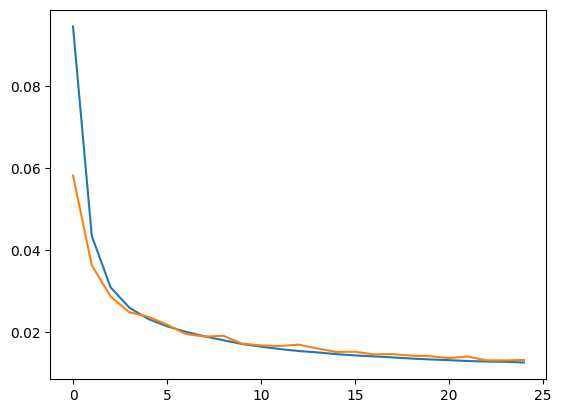

In [37]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

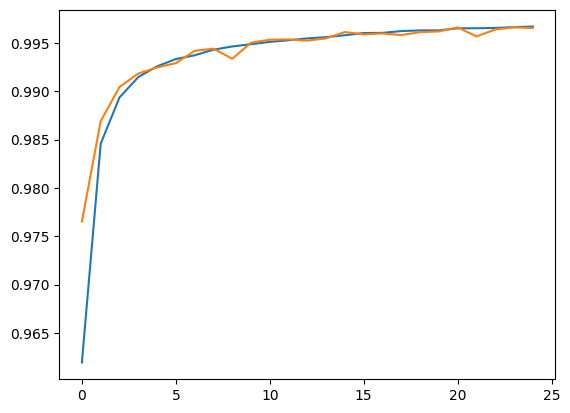

In [38]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

Comparing model Accuracy of all model

In [39]:
# Comparing model
data = [["Random_forest",accuracy_score(y_test, y_rfc), f1_score(y_test, y_rfc)],
        ["Logistic_Regression",accuracy_score(y_test, y_pred_log), f1_score(y_test, y_pred_log)],
        ["SVM", accuracy_score(y_test, y_model_svm), f1_score(y_test, y_model_svm)],
        ["KNN",accuracy_score(y_test, y_model_knn), f1_score(y_test, y_model_knn)],
        ["Sequence_model",accuracy_score(y_test, y_pred_seq), f1_score(y_test, y_pred_seq)]]

model_accuracy = pd.DataFrame(data, columns=["Model_name","Acc_score", "F1-score"])
model_accuracy

,Model_name,Acc_score,F1-score
0,Random_forest,0.999818,0.999819
1,Logistic_Regression,0.964916,0.964442
2,SVM,0.996788,0.996793
3,KNN,0.997649,0.997658
4,Sequence_model,0.996477,0.996488
